In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/data (1).csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop non-feature columns
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)
if 'Unnamed: 32' in df.columns:
    df = df.drop(['Unnamed: 32'], axis=1)

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['diagnosis'])

# Separate features (X) and target (y)
X = df.drop(['diagnosis', 'target'], axis=1).values
y = df['target'].values


In [ ]:
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# MDS
mds = MDS(n_components=2, random_state=0)
X_mds = mds.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


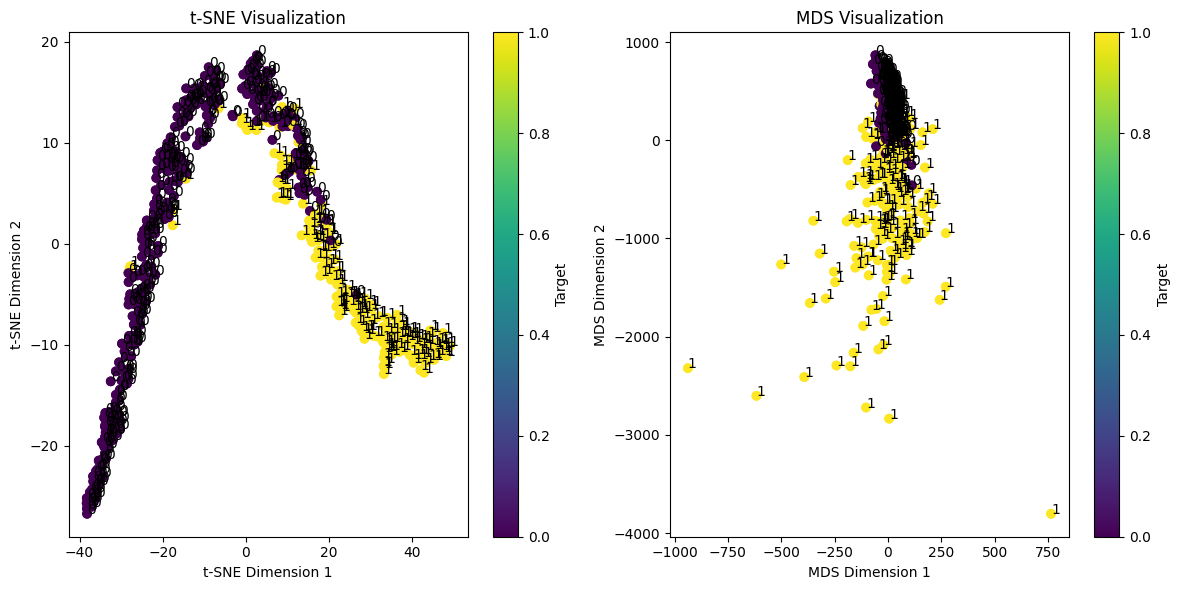

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# t-SNE plot
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
axs[0].set_title('t-SNE Visualization')
axs[0].set_xlabel('t-SNE Dimension 1')
axs[0].set_ylabel('t-SNE Dimension 2')

# Annotate each point with its target label
for i, txt in enumerate(y):
    axs[0].annotate(str(txt), (X_tsne[i, 0], X_tsne[i, 1]))

# Add colorbar
cbar1 = fig.colorbar(axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y), ax=axs[0])
cbar1.set_label('Target')

# MDS plot
axs[1].scatter(X_mds[:, 0], X_mds[:, 1], c=y)
axs[1].set_title('MDS Visualization')
axs[1].set_xlabel('MDS Dimension 1')
axs[1].set_ylabel('MDS Dimension 2')

# Annotate each point with its target label
for i, txt in enumerate(y):
    axs[1].annotate(str(txt), (X_mds[i, 0], X_mds[i, 1]))

# Add colorbar
cbar2 = fig.colorbar(axs[1].scatter(X_mds[:, 0], X_mds[:, 1], c=y), ax=axs[1])
cbar2.set_label('Target')

plt.tight_layout()
plt.show()
